*Universidad de Chile*  
*Facultad de Ciencias Físicas y Matemáticas*  
*Departamento de Ingeniería Matemática*
 
# Laboratorio 1
**Curso:** MA4703-1 Control Óptimo: Teoría y Laboratorio  
**Profesor:** Héctor Ramírez C.  
**Auxiliares:** Javier Madariaga R. y Pablo Araya Z.   
**Alumno:** Diego Dominguez

In [1]:
from sympy import *
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog, minimize, fsolve
import pyplane.app as pp
import pandas as pd
from IPython import display


## Ejercicio 1

En esta pregunta se quiere resolver el siguiente sistema de ecuaciones diferenciales no lineal:

\begin{align}
&\dot{x}=2x - xy \\
&\dot{y}=-y+cos(y)\\
&x(0)=1\\
&y(0)=5
\end{align}

## a)

In [2]:
t = symbols('t')
x = Function('x')
y = Function('y')
eq1=Eq(diff(x(t),t),2*x(t)-x(t)*y(t))
eq2=Eq(diff(y(t),t),-y(t)+cos(y(t)))
sol = dsolve([eq1,eq2],[x(t),y(t)])

x_t=sol[0].rhs
y_t=sol[1].rhs

In [3]:
print(x_t)
x_t

exp(-C1 + exp(-C2 - t) + 2)


exp(-C1 + exp(-C2 - t) + 2)

In [4]:
y_t

C1 + log(exp(-C1 + exp(-C2 - t) + 2))

## b)

In [5]:
def sistema1(t, z, c):
    x=z[0]
    y=z[1]
    dzdt = [c[0]*x-x*y, -y+np.cos(y)] #Sistema de ecuaciones
    return dzdt

#Parametros
tspan = np.linspace(0, 5, 100)
z_0 = [1, 5]
cte = [2]

sol_scipy = solve_ivp(lambda t, z: sistema1(t, z, cte), t_span=[tspan[0], tspan[-1]], y0=z_0, rtol = 1e-10)

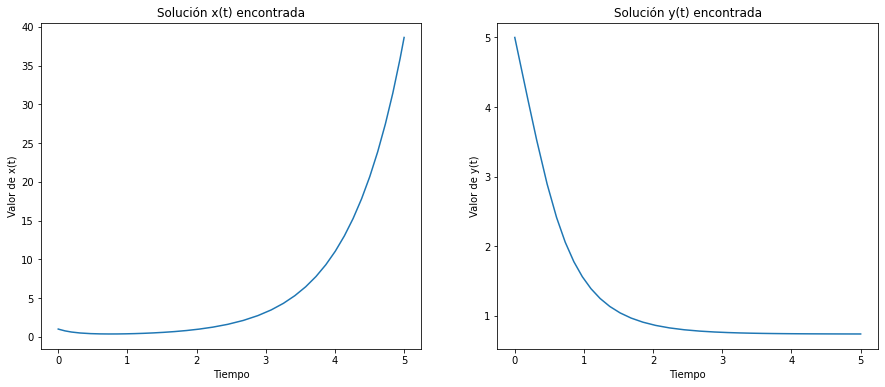

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

axes[0].set_title('Solución x(t) encontrada')
axes[0].plot(sol_scipy.t,sol_scipy.y[0])
axes[0].set_xlabel('Tiempo')
axes[0].set_ylabel('Valor de x(t)')

axes[1].set_title('Solución y(t) encontrada')
axes[1].plot(sol_scipy.t,sol_scipy.y[1])
axes[1].set_xlabel('Tiempo')
axes[1].set_ylabel('Valor de y(t)');

## c)

Diagrama de fase para condición incial $x_0 = 1$, $y_0 = 5$.

<img src="cb1.png" style="width:900px;height:300px"/>


Diagrama de fase para distintas condiciones iniciales.

<img src="ej1_2_pp.png" style="width:400px;height:400px"/>

Con las soluciones encontradas por sympy, se tiene que $y(t)=C_1+log(exp(-C_1+e^{-C_2-t}+2))=C_1+log(e^{-C_1})+log(exp(e^{-C_2-t}))+log(e^2)$
$=C_1-C_1+e^{-C_2-t}+2=e^{-C_2-t}+2$.

Reemplazando este función en la ecuación $\dot{y}=-y+cos(y)$, se obtiene que:

\begin{align}
-e^{-C_2-t}=-e^{-C_2-t}-2+cos(y) \Longrightarrow cos(y)=2
\end{align}

Lo cuál no tiene sentido si la función y(t) va a valores reales. Por lo tanto, se infiere que sympy no pudo solucionar adecuadamente este sistema.

Por otro lado, los resultados obtenidos por solve_ivp de scipy se asemejan más a los diagramas de fase que nos entregó pyplane, por lo tanto se puede conlcuir que es recomendable usar sicpy para resolver sistemas de ecuaciones diferenciales. 

## Ejercicio 2

A continuación se considera el siguiente sistema de control en $\mathbb{R}^2$.

\begin{align}
\dot{X} (t) = AX(t)+Bu(t) ~~ \text{ con } ~~ A=\begin{pmatrix}2 & 2 \\-5 & 3 \end{pmatrix}, ~~ B = \begin{pmatrix}5\\1  \end{pmatrix}
\end{align}

con las siguientes condiciones iniciales $X_0=(0,0)$.

Considerando $X= (x, y)$, este sistema se puede reescribir de la siguiente manera:

\begin{align}\begin{cases} \dot{x} = 2x + 2y + 5u \\
\dot{y} = -5x+3y+u
\end{cases}
\end{align}

A continuación se resuelve el sistema para los controles: $u_1 (t) = 0.2$, $u_2 (t) = e^t$ y $u_3 (t) = e^{-t}cos(t)$.

In [7]:
def sistema2(t, z, c, u):
    x=z[0]
    y=z[1]
    dzdt = [c[0]*x+c[1]*y+c[2]*u(t), c[3]*x+c[4]*y+u(t)]
    return dzdt

tspan = np.linspace(0, 10, 100)
z_0 = [0, 0]
cte = [2,2,5,-5,3]

u1=lambda t: 0.2
u2=lambda t: np.exp(t)
u3=lambda t: np.exp(-t)*np.cos(t)

sol1 = solve_ivp(lambda t, z: sistema2(t, z, cte, u1), t_span=[tspan[0], tspan[-1]], y0=z_0, rtol = 1e-10)
sol2 = solve_ivp(lambda t, z: sistema2(t, z, cte, u2), t_span=[tspan[0], tspan[-1]], y0=z_0, rtol = 1e-10)
sol3 = solve_ivp(lambda t, z: sistema2(t, z, cte, u3), t_span=[tspan[0], tspan[-1]], y0=z_0, rtol = 1e-10)

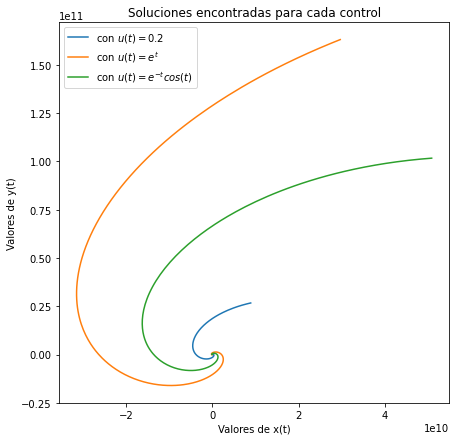

In [8]:
plt.figure(figsize=(7,7))
plt.plot(sol1.y[0],sol1.y[1], label=r'con $u(t)=0.2$')
plt.plot(sol2.y[0],sol2.y[1], label=r'con $u(t)=e^t$')
plt.plot(sol3.y[0],sol3.y[1], label=r'con $u(t)=e^{-t}cos(t)$')
plt.legend()
plt.xlabel('Valores de x(t)')
plt.ylabel('Valores de y(t)')
plt.title('Soluciones encontradas para cada control');

## Ejercicio 3

\begin{align}
&\!\min_{x, y, z}   f(x,y,z) = -8x-y-3z \label{eq:optProb}\\
&\text{s.a.}  ~~ -x+y+z \leq 13\label{eq:constraint1}\\
&             ~~~~~~~~ 3x+5y+z \leq 10\label{eq:constraint2}\\
&             ~~~~~~~~ 9x-5y \leq 20\label{eq:constraint3}\\
&             ~~~~~~~~ x,y,z \geq 0
\end{align}

In [9]:
c = [-8, -1, -3]
A = [[-1, 1, 1], [3, 5, 5], [9, -5, 0]]
b = [13, 10, 20]
x_bounds = (0, None)
y_bounds = (0, None)
z_bounds = (0, None)

metodos=['highs','highs-ds','highs-ipm','interior-point','revised simplex','simplex']
for metodo in metodos:
    res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds, z_bounds], method=metodo)
    print('Solución con el método '+str(metodo)+':', res.x)


Solución con el método highs: [2.5 0.5 0. ]
Solución con el método highs-ds: [2.5 0.5 0. ]
Solución con el método highs-ipm: [2.5 0.5 0. ]
Solución con el método interior-point: [2.50000000e+00 5.00000000e-01 8.59215039e-10]
Solución con el método revised simplex: [2.5 0.5 0. ]
Solución con el método simplex: [2.5 0.5 0. ]


# Ejercicio 4

En este problema se quiere maximizar el volumen de un paquete postal con forma de paralelepipedo rectangular. Además se requiere que el perimetro de la base de este paquete más su altura no exceda los 53 cm. 

Este problema se puede modelar de la siguiente manera:

\begin{align}
&\!\min_{x, y, z}   -V(x,y,z) = -xyz \label{eq:optProb}\\
&\text{s.a.}  ~~ 2x+2y+z \leq 53\label{eq:constraint1}\\
&             ~~~~~~~~ x,y,z \geq 0
\end{align}

In [10]:
#Función que calcula el volumen
def volumen(x):
    largo=x[0]
    ancho=x[1]
    alto=x[2]
    Volumen=largo*ancho*alto
    return Volumen

#Función para calcular el perimetro mas la altura
def perimetroAltura(x):
    largo=x[0]
    ancho=x[1]
    alto=x[2]
    Perimetro=2*(largo+ancho)
    return Perimetro+alto

#Funcion objetivo: -Volumen
def funcObjetivo(x):
    return -volumen(x)

#Restriccion del problema 53-2x-2y-z >= 0
def restriccion(x):
    return 53-perimetroAltura(x)

In [11]:
x0=[1,1,1] #Punto inicial

#Restricciones
rest= [{'type': 'ineq', 'fun':restriccion}, {'type': 'ineq', 'fun': lambda x: x[0]}, {'type': 'ineq', 'fun': lambda x: x[1]},  {'type': 'ineq', 'fun': lambda x: x[2]}]

#Se calcula la solución
sol=minimize(funcObjetivo, x0, method='COBYLA', constraints=rest, tol=1e-5, options={'disp': True})

In [12]:
x_Opt=sol.x
volumen_Opt=-sol.fun
perimetro_alt=perimetroAltura(x_Opt)

print('Solución: ', x_Opt)
print('Volumen máximo: ', volumen_Opt)
print('Perimetro + Altura: ', perimetro_alt)

Solución:  [ 8.83332734  8.83334226 17.66666079]
Volumen máximo:  1378.4907407396418
Perimetro + Altura:  52.99999999999998


## Ejercicio 5

En este problema se busca obtener los puntos de intersección $(x,y)$ de las siguientes cónicas:

\begin{align}\begin{cases} 2x^2 +y =1 \\
(x - \frac{1}{2})^2 - 2(y - \frac{1}{4})^2 = 1
\end{cases}
\end{align}

Para encontrar la solución, el sistema se plantea de la siguiente forma:

\begin{align}\begin{cases} Eq_1: ~ 2x^2 +y - 1 = 0\\
Eq_2: ~ (x - \frac{1}{2})^2 - 2(y - \frac{1}{4})^2 - 1 = 0
\end{cases}
\end{align}

In [13]:
def ejercicio5(x):
    Eq1=2*x[0]**2+x[1]-1
    Eq2=(x[0]-0.5)**2-2*(x[1]-1/4)**2-1
    return [Eq1, Eq2]

f1=lambda x: 1-2*x**2 #Eq1: y=1-2x^2

In [14]:
intersec1=fsolve(ejercicio5, [-1,-1])
intersec2=fsolve(ejercicio5, [0,0])

pd.DataFrame({'intersecciones': [np.round(intersec1,3), np.round(intersec2,3)], 'valores del sistema': [ejercicio5(intersec1), ejercicio5(intersec2)]})

,intersecciones,valores del sistema
0,"[-0.827, -0.366]","[4.929390229335695e-14, 7.72715225139109e-14]"
1,"[-0.533, 0.432]","[3.801403636316536e-13, 1.1888268147686176e-12]"


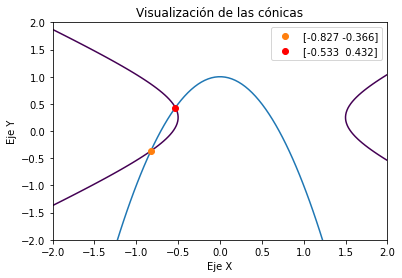

In [15]:
#Plot ecuación 2
x = np.linspace(-2.0, 2.0, 100)
y = np.linspace(-2.0, 2.0, 100)
X, Y = np.meshgrid(x,y)
F = (X-0.5)**2 -2*(Y-0.25)**2 - 1
plt.contour(X,Y,F,[0])

#Plot ecuación 1
plt.plot(x,f1(x))

#Plot intersecciones
plt.plot(intersec1[0],intersec1[1],'o',label=str(np.round(intersec1,3)))
plt.plot(intersec2[0],intersec2[1],'o',c='red',label=str(np.round(intersec2,3)))

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Visualización de las cónicas')
plt.ylim((-2,2))
plt.legend()
plt.show()

De este problema se puede apreciar que el comando fsolve de scipy es muy sensible a los valores iniciales entregados, ya que solo entrega la solución más cercana al punto entregado. De hecho, si este valor es muy lejano a la solución, la función fsolve entrega un resultado bastante erroneo. Por este motivo, se tuvo que invocar a la función dos veces con dos puntos iniciales distintos. 

## Ejercicio 6

En este problema se quiere modelar las reacciones químicas de tres componentes $A, B, C$. Considerando las variables de estado $a,b,c$ como las fracciones molares de $A, B, C$, las constantes de velocidad de las reacciones químicas como $k_1 , k_2 , k_3$, y $u(t) \in [0,1]$ como la variable de control, el problema de control óptimo se puede modelar de la siguiente forma:

\begin{equation}\label{eq:robust-optimization-2}
    (G)\begin{cases}\begin{aligned}
         & \text{max}_{u(\cdot )} & &c(t_f)& & \\
         &  & & \dot{a}(t) = -u(t)(k_1 a(t) - k_2 b(t)) & & a(0)=1  \\
                    & & &\dot{b}(t) = u(t)(k_1 a(t)-k_2 b(t))-(1-u(t))k_3 b(t) & & b(0)=0\\
                    & & &\dot{c}(t) = (1-u(t))k_3 b(t) && c(0)=1\\
                    & & &u(t) \in [0,1] ~~ \forall t \in [0, t_f]\\
    \end{aligned}\end{cases}
\end{equation}

## 1)

Este problema se puede reescribir como un problema de control ótimo tipo Mayer, para esto se definen las siguiente variables:

\begin{align}
y(t)=\begin{pmatrix}a(t)\\b(t)\\c(t) \end{pmatrix}
\Longrightarrow \dot{y(t)}=\begin{pmatrix}-u(t)(k_1 a(t) - k_2 b(t))\\u(t)(k_1 a(t)-k_2 b(t))-(1-u(t))k_3 b(t)\\(1-u(t))k_3 b(t) \end{pmatrix}:= f(y(t), u(t)) ~~ \forall t \in [t_0, t_f]
\end{align}

\begin{align}
J(t_0, y(t_0), t_f,y(t_f)) = (0,0,-1) \cdot y(t_f) = -c(t_f), ~~~~~ \Phi(t_0, y(t_0), t_f,y(t_f))=y(t_0)=\begin{pmatrix}a(t_0)\\b(t_0)\\c(t_0) \end{pmatrix}, ~~~~~ g(y(t), u(t)) \equiv 0
\end{align}

\begin{align}y_l =-\infty , ~ y_u=\infty, ~~~~~ u_l=0, ~ u_u=1, ~~~~~ g_l=-\infty, g_u=\infty, ~~~~~\Phi_l = \Phi_u = \begin{pmatrix}1\\0\\1 \end{pmatrix}\end{align}

De esta manera, y considerando $t_0=0$, el sistema queda de la siguiente forma:

\begin{equation}\label{eq:robust-optimization-2}
    (M)\begin{cases}\begin{aligned}
         & \text{min}_{u(\cdot )} & &J(t_0, y(t_0), t_f,y(t_f)) = (0,0,-1) \cdot y(t_f)& & (Criterio) \\
         &  & & \dot{y}(t)= f(y(t), u(t)) & & (Dinámica) \\
                    & & & \Phi_l \leq \Phi(t_0, y(t_0), t_f,y(t_f))=y(t_0) \leq \Phi_u & & (Condicion ~de ~borde)\\
                    & & &-\infty \leq y(t) \leq \infty, ~~~ 0 \leq u(t) \leq 1 ~~ \forall t \in [0, t_f]&& (Cotas) \\
                    & & & -\infty \leq g(y(t),u(t)) \leq \infty ~~ \forall t \in [0, t_f] && (Restricciones ~mixtas)\\
    \end{aligned}\end{cases}
\end{equation}

# 2) 

En esta pregunta se añade una nueva condición de borde $a(t_f)$. A continución se muestran los resultados obtenidos para distintos tiempos finales y valores para $a(t_f)$.

**Condición: $a(5)=0.7$** 

Valor objetivo obtenido: -1.25373

<img src="ej6-p2_5-07.PNG" style="width:600px;height:400px"/>

**Condición: $a(7)=0.7$**

Valor objetivo obtenido: -1.28999

<img src="ej6-p2_7-07.PNG" style="width:600px;height:400px"/>


**Condición: $a(10)=0.7$**

Valor objetivo obtenido: -1.2995

<img src="ej6-p2_10-07.PNG" style="width:600px;height:400px"/>

**Condición: $a(5)=0.9$**

Valor objetivo obtenido: -1.09905

<img src="ej6-p2_5-09.PNG" style="width:600px;height:400px"/>

**Condición: $a(7)=0.9$**

Valor objetivo obtenido: -1.09987

<img src="ej6-p2_7-09.PNG" style="width:600px;height:400px"/>

**Condición: $a(10)=0.9$**

Valor objetivo obtenido: -1.09999

<img src="ej6-p2_10-09.PNG" style="width:600px;height:400px"/>

# 3)

Ahora se pide añadir dos cotas inferiores para las variables $a$ y $c$ evaluadas en el tiempo final. Es decir, $0.8 \leq a(t_f)$, $0.05 \leq b(t_f)$

**Cota inferior: $0.8 \leq a(5)$, $~~0.05 \leq b(5)$**

Valor objetivo obtenido: -1.15

<img src="ej6-p3_5.PNG" style="width:600px;height:400px"/>

**Cota inferior: $0.8 \leq a(7)$, $~~0.05 \leq b(7)$**

Valor objetivo obtenido: -1.15

<img src="ej6-p3_7.PNG" style="width:600px;height:400px"/>

**Cota inferior: $0.8 \leq a(10)$, $~~0.05 \leq b(10)$**

Valor objetivo obtenido: -1.15

<img src="ej6-p3_10.PNG" style="width:600px;height:400px"/>

## Ejercicio 7

## 1)

Para esta pregunta se considera el siguiente problema de control óptimo:

\begin{equation}
    (B) \begin{cases}\begin{aligned}
         & \text{min}_{u(\cdot )} & & \int_0^{t_f} u(t)^2 dt& & \\
         &  & & y^{(3)} (t) =u(t) & &   \\
                    & & & y(t) \geq 0 & & \\
                    & & & y(0)=1,~ \dot{y}(0)=-2, ~ \ddot{y}(0)=0&& \\
                    & & & y(10)=0, ~ \dot{y}(10)=0, ~ \ddot{y}(10)=0 \\
    \end{aligned}\end{cases}
\end{equation}

El problema original que esta programado en el ejemplo robbibs, cuenta con una diferente función objetivo. Esta es de la forma $\int_0^{t_f} \alpha y + \beta y^2 + \gamma u^2 dt$.

Para obtener el sistema $(B)$, basta considerar $\alpha = \beta = 0$ y $\gamma = 1$. Luego se considera el siguiente cambio de variable:

\begin{align}
Y=\begin{pmatrix}y\\ \dot{y} \\ \ddot{y} \\ z \end{pmatrix} \Longrightarrow \dot{Y}=\begin{pmatrix} \dot{y}\\ \ddot{y} \\ \dddot{y} \\ \dot{z} \end{pmatrix} = \begin{pmatrix} \dot{y}(t)\\ \ddot{y}(t) \\ u(t) \\ \dot{z}(t) \end{pmatrix}  && (Dinamica)
\end{align}

Con $z$ una nueva variable de estado con las siguientes condiciones de borde $z(t_f)=\int_0^{t_f} u(t)^2 dt$, $z(0)=0$.

## 2)

A continuación se definen las siguientes funciones y cotas:

\begin{align}
J(t_0, Y(t_0), t_f,Y(t_f)) = (0,0,0,1) \cdot Y(t_f)=z(t_f), ~~~~~ \dot{Y}(t) = \begin{pmatrix} \dot{y}(t)\\ \ddot{y}(t) \\ u(t) \\ \dot{z}(t) \end{pmatrix} = f(Y(t), u(t)), ~~~~~ g(Y(t),u(t))\equiv 0
\end{align}

\begin{align}
\Phi(t_0, Y(t_0), t_f,Y(t_f)) = \begin{pmatrix} Y(t_0) \\ Y(t_f) \end{pmatrix} = \begin{pmatrix} y(t_0) \\ \dot{y}(t_0) \\ \ddot{y}(t_0) \\ z(t_0) \\ y(t_f) \\ \dot{y}(t_f) \\ \ddot{y}(t_f) \\ z(t_f) \end{pmatrix} 
\end{align}

\begin{align}
\Phi_l = \begin{pmatrix} 1 \\ -2 \\ 0\\ 0 \end{pmatrix}, ~~ \Phi_u= \begin{pmatrix} 0\\ 0 \\ 0 \\ \int_0^{t_f} u(t)^2 dt \end{pmatrix}, ~~~~~ y_l=0, ~ y_u=\infty, ~~~~~ g_l= -\infty , ~ g_u=\infty, ~~~~ u_l=-\infty, u_u=\infty
\end{align}

Con estas variables introducidas y con $t_0=0, t_f=10$, el sistema $(B)$ se puede escrbir como un problema mayer $(M)$.

\begin{equation}\label{eq:robust-optimization-2}
    (M)\begin{cases}\begin{aligned}
         & \text{min}_{u(\cdot )} & &J(t_0, Y(t_0), t_f,Y(t_f)) = (0,0,0,1) \cdot Y(t_f)& & (Criterio) \\
         &  & & \dot{Y}(t) = f(Y(t), u(t)) & & (Dinámica) \\
                    & & & \phi_l \leq \phi(t_0, Y(t_0), t_f,Y(t_f))= \begin{pmatrix} Y(t_0) \\ Y(t_f) \end{pmatrix} \leq \phi_u & & (Condicion ~de ~borde)\\
                    & & & 0 \leq y(t) \leq \infty, ~~~ -\infty \leq u(t) \leq \infty ~~ \forall t \in [0, t_f]&& (Cotas) \\
                    & & & -\infty \leq g(y(t),u(t)) \leq \infty ~~ \forall t \in [0, t_f] && (Restricciones ~mixtas)\\
    \end{aligned}\end{cases}
\end{equation}

## 3)

A continuación se añade una nueva restricción a la variable $y(t)$ y otra condición de borde a $\ddot{y}$. En los siguientes gráficos se muestran los resultados obtenidos al resolver $(M)$ agregando las restricciones $y(t) \leq 1.5$, $\ddot{y}(t_f)=3,5,7.$

**Condición de borde: $\ddot{y}(10)=3$** $~~$ *Obs: Para poder resolver este caso se cambio el valor de la cte. $k_1$ de $1$ a $1.1$*

Valor objetivo obtenido: 44.3247

<img src="ej7-p3_ddy_3.PNG" style="width:700px;height:400px"/>

**Condición de borde: $\ddot{y}(10)=5$**

Valor objetivo obtenido: 79.0864

<img src="ej7-p3_ddy_5.PNG" style="width:700px;height:400px"/>

**Condición de borde: $\ddot{y}(10)=7$**

Valor objetivo obtenido: 142.377

<img src="ej7-p3_ddy_7.PNG" style="width:700px;height:400px"/>

## 4)

En esta última pregunta se considera $\alpha = 3$, de tal forma que la función objetivo queda como: $\int_0^{t_f} 3 y + u^2 = 3\int_0^{t_f} y(t) dt+ z(t_f)$.

Repitiendo el procedimiento anterior, se consiguen los siguientes resultados:

**Condición de borde: $\ddot{y}(10)=3$**

Valor objetivo obtenido: 60.8176

<img src="ej7-p4_ddy_3.PNG" style="width:700px;height:400px"/>

**Condición de borde: $\ddot{y}(10)=5$**

Valor objetivo obtenido: 96.1491

<img src="ej7-p4_ddy_5.PNG" style="width:700px;height:400px"/>

**Condición de borde: $\ddot{y}(10)=7$**

Valor objetivo obtenido: 158.041

<img src="ej7-p4_ddy_7.PNG" style="width:700px;height:400px"/>